In [11]:
# Importe a biblioteca requests para fazer requisições HTTP
import requests

# Importe a biblioteca pandas para trabalhar com DataFrames
import pandas as pd

# Defina a URL da API que será consultada
url = "https://dadosabertos.aneel.gov.br/api/action/datastore_search?resource_id=b1bd71e7-d0ad-4214-9053-cbd58e9564a7&limit=1000000"

# Defina o tempo máximo de espera para a resposta da requisição
timeout_seconds = 10

# Crie uma função para obter os dados da API e retornar um DataFrame
def get_data(url, timeout_seconds):
    try:
        # Faça uma requisição GET para a URL especificada, com o tempo limite definido
        response = requests.get(url, timeout=timeout_seconds)

        # Verifique se houve algum erro na resposta HTTP
        response.raise_for_status()
    except requests.exceptions.RequestException as e:
        # Se houve algum erro na requisição, imprima o erro e retorne None
        print("Erro ao obter os dados:", e)
        return None

    # Verifique se o código de status da resposta HTTP é 200, indicando que a requisição foi bem sucedida
    if response.status_code == 200:
        # Se a resposta foi bem sucedida, obtenha os dados em formato JSON
        data = response.json()

        # Imprima uma mensagem de sucesso
        print("Requisição bem sucedida")

        # Verifique se a API retornou dados
        if data["success"]:
            # Se a API retornou dados, obtenha a lista de registros e a lista de colunas
            records = data["result"]["records"]
            columns = data["result"]["fields"]

            # Adicione as colunas "SigUF", "Bandeira" e "Nome_agente" na lista de colunas
            columns.append({"id": "Bandeira", "type": "text"})
            columns.append({"id": "Nome_agente", "type": "text"})

            # Crie um DataFrame a partir das listas de registros e colunas
            df = pd.DataFrame.from_records(records, columns=[c["id"] for c in columns])

            # Retorne o DataFrame criado
            return df
        else:
            # Se a API não retornou dados, imprima uma mensagem de aviso e retorne None
            print("A API não retornou dados.")
            return None
    else:
        # Se o código de status da resposta HTTP for diferente de 200, trate o erro de acordo com o código
        if response.status_code == 400:
            print("Requisição mal formada.")
        elif response.status_code == 401:
            print("Não autorizado.")
        elif response.status_code == 403:
            print("Acesso proibido.")
        elif response.status_code == 404:
            print("Recurso não encontrado.") 
        elif response.status_code == 500:
            print("Erro interno do servidor.")
        else:
            print("Erro desconhecido ao obter os dados.")

        # Retorne None em caso de erro
        return None

# Chame a função get_data para obter um DataFrame com os dados da API
df = get_data(url, timeout_seconds)

Requisição bem sucedida


In [16]:
# VISUALIZAÇÔES


Verificar a distribuição de classes de consumo e subgrupos tarifários entre as distribuidoras de energia.
Identificar se há diferenças significativas nos valores de tarifa entre as distribuidoras e subgrupos tarifários.
Analisar a evolução da potência instalada em kW e do número de consumidores atendidos pelas distribuidoras ao longo do tempo.
Identificar as distribuidoras que atendem mais de uma região do país e comparar as características de cada uma delas.
Investigar se há diferenças nas tarifas entre distribuidoras que atendem a mesma região.
Avaliar o impacto da bandeira tarifária no valor da conta de energia elétrica dos consumidores.
Identificar se há padrões de comportamento de consumo de energia elétrica em determinadas regiões do país.


# PREVISÔES

Previsão do consumo de energia elétrica por classe de consumo e subgrupo tarifário ao longo do tempo.
Previsão da tarifa média por subgrupo tarifário, considerando variáveis como o porte do agente e a localização geográfica.
Previsão do número de consumidores por distribuidora de energia elétrica, considerando variáveis como a região geográfica e o porte do agente.
Previsão da demanda máxima de energia elétrica por subestação, considerando variáveis como a potência instalada e o tipo de conexão à rede elétrica.
Previsão do valor total da fatura de energia elétrica de um consumidor, considerando variáveis como o consumo mensal de energia elétrica, a tarifa aplicada e as bandeiras tarifárias.


# ML

Previsão de demanda: pode ser desenvolvido um modelo de regressão para prever a demanda de energia elétrica em determinado período, levando em conta variáveis como período do ano, temperatura média, classe de consumo, etc. Isso pode ajudar as distribuidoras a planejarem melhor a geração e distribuição de energia.

SyntaxError: invalid syntax (3001294477.py, line 1)

In [13]:
import pandas as pd

df0  = df
df0['DthAtualizaCadastralEmpreend'] = pd.to_datetime(df0['DthAtualizaCadastralEmpreend'])
df0['DthAtualizaCadastralEmpreend_YM'] = df0['DthAtualizaCadastralEmpreend'].dt.strftime('%Y').astype(int)
#df0['DthAtualizaCadastralEmpreend_Y'] = pd.to_object(df0['DthAtualizaCadastralEmpreend_Y'])


df0['empresas'] = 1

# Contagem de NumCPFCNPJ 
df_gp1 = df0.groupby(['DthAtualizaCadastralEmpreend_YM','SigUF', 'DscClasseConsumo'])['NumCPFCNPJ'].count().reset_index()

# Somatório de NumCPFCNPJ
df_gp2 = df0.groupby(['DthAtualizaCadastralEmpreend_YM','SigUF', 'DscClasseConsumo'])['empresas'].sum().reset_index()

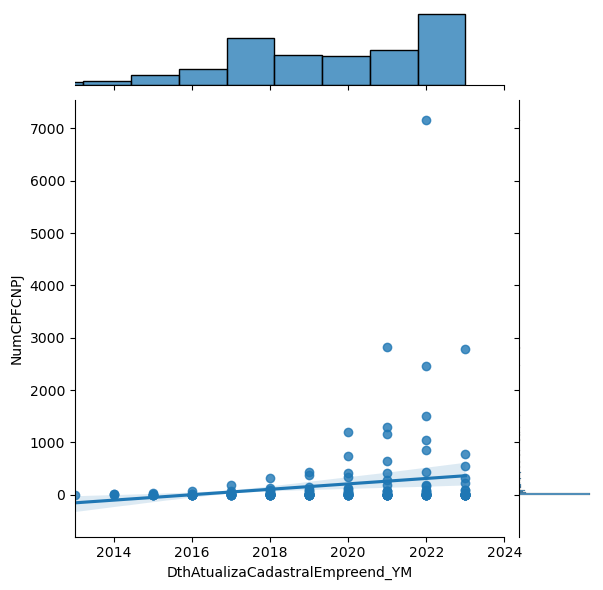

In [42]:
g = sns.JointGrid(data = df_gp1, 
                  x = 'DthAtualizaCadastralEmpreend_YM', 
                  y = 'NumCPFCNPJ', xlim = (2013,2024)
                 )
g.plot(sns.regplot, sns.histplot)

plt.show()

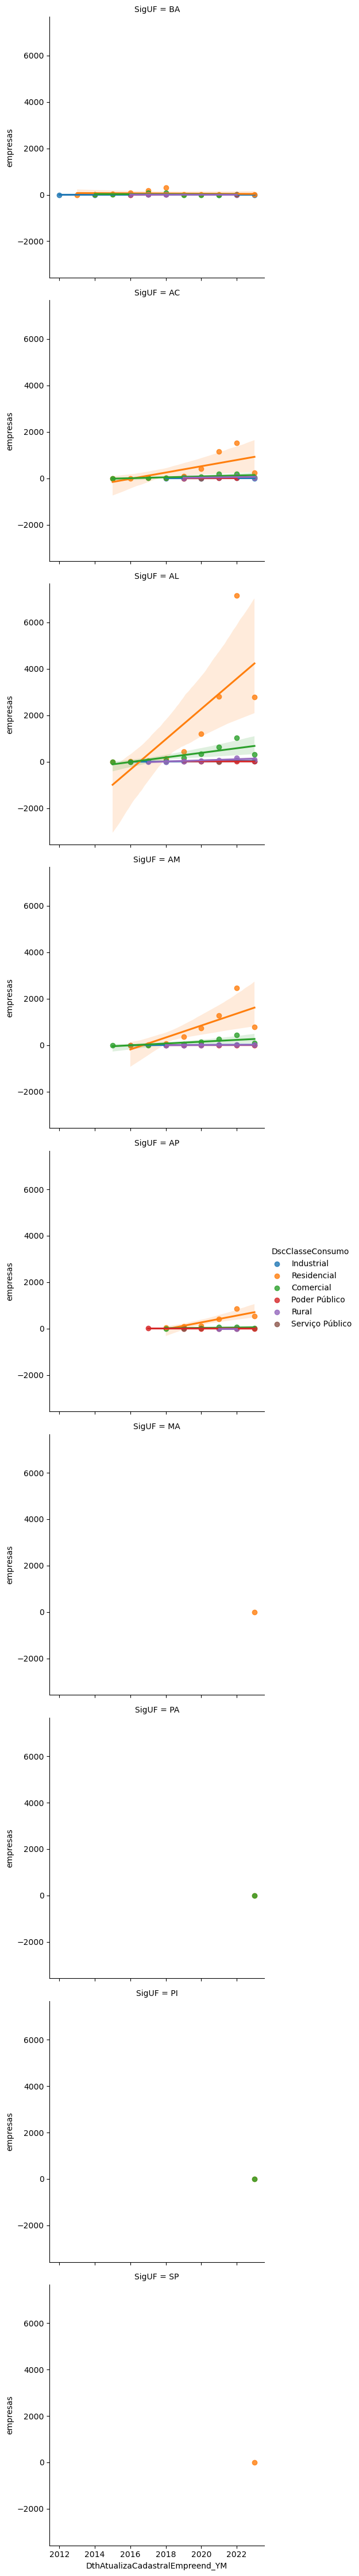

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(data = df_gp2, 
           x="DthAtualizaCadastralEmpreend_YM", 
           y="empresas",
           hue = "DscClasseConsumo",
           row ="SigUF")

plt.show()

In [ ]:
identificar se há padrões de comportamento de consumo de energia elétrica em determinadas 
regiões do país



In [17]:
import dash
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd

# inicializa o aplicativo do flask
app = Dash(__name__)


# define as bases de dados
# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options

# dfs utilizados na visualização
df_gp1



# cria o gráfico
fig1 = px.bar(df_gp1, x="DthAtualizaCadastralEmpreend_YM", y="NumCPFCNPJ", barmode="group")
lista_uf = list(df_gp1['SigUF'].unique())


# Construção do layout por html (coisas fixas)
app.layout = html.Div(children=[
    # títulos
    html.H1(children='Teste Energisa'),
    html.H2(children='gráfico de visualização da base de dados'),
    # textinho
    html.Div(children='''
        OBS: eu to puto pq passei o dia travado
    '''),
    
    
    #informações p/ criar botões
    dcc.Dropdown(['NYC', 'MTL', 'SF'], 'NYC', id='demo-dropdown'),


# Botões que manipulam o gráfico
    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1

C:\Users\ghumb\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3465: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.

